In [454]:
#!pip install shap

In [455]:
import numpy as np
import pandas as pd
import random
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier,plot_importance 
import csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing

#colab輸出字體及掛接雲端硬碟
#from matplotlib.font_manager import fontManager
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
#fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
#plt.rc('font', family='Taipei Sans TC Beta')
#from google.colab import drive
#drive.mount('/content/drive')
#from google.colab import files

In [456]:
#使用train.csv做訓練資料得出結果
train =pd.read_csv('drive/MyDrive/敦謙/train.csv')##資料處理
test =pd.read_csv('drive/MyDrive/敦謙/test.csv')##資料處理
x_train=train.iloc[0:,0:18]
y_train=train.iloc[0:,18]#將y定為revenue欄位
x_test=test.iloc[0:,0:]
x_train =x_train.drop(columns =["ID","SpecialDay","Weekend","Region"])#drop feature
x_test =x_test.drop(columns =["ID","SpecialDay","Weekend","Region"])

In [457]:
##切分train.csv來訓練模型
#df =pd.read_csv('drive/MyDrive/敦謙/train.csv')##資料處理
#x_train=df.iloc[0:,0:18]
#y_train=df.iloc[0:,18]
#x_train =x_train.drop(columns =["ID","SpecialDay","Weekend","Region"])#drop feature
#x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)#資料切分

In [458]:
#GridSearch程式碼
#classifier=XGBClassifier()#grid search用的模型
##cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#para = dict()#放入欲調整參數
#para['n_estimators'] = range(100,300,20)
#para['learning_rate'] =[0.17]
#para['max_depth'] = [4]
#para['min_child_weight'] = [1]
#search = GridSearchCV(classifier, para, scoring='accuracy', n_jobs=-1, cv=5)
#result = search.fit(x_train,y_train)
#print('Best Score: %s' % result.best_score_)
#print('Best Hyperparameters: %s' % result.best_params_)

In [459]:
#進入模型
classifier = XGBClassifier(n_estimators=210,learning_rate=0.17,max_depth=4,min_child_weight=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [460]:
##印出準確率
#print('訓練集準確率: ',classifier.score(x_train,y_train))
#print('測試集準確率: ',classifier.score(x_test,y_test))

##做交叉驗證
#accuracies=cross_val_score(estimator=classifier ,X=x_train,y=y_train,cv=10 )
#print("cross_validation:")
#print("訓練集平均值:",accuracies.mean())
#print("訓練集標準差:",accuracies.std())

In [461]:
##做出混淆矩陣及計算各數值
#cm=confusion_matrix(y_test,y_pred)
#print("混淆矩陣:")
#print(cm)
#print("accuracy:",(1296+175)/(1296+57+92+175))
#print("precision",175/(175+57))
#print("recall:",175/(175+92))

In [467]:
#將y_pred以csv印出
#np.savetxt('drive/MyDrive/敦謙/result.csv',y_pred, delimiter=',')

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 

<function matplotlib.pyplot.show(*args, **kw)>

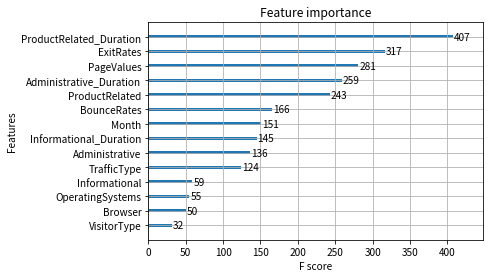

In [463]:
#印出feature importance
plot_importance(classifier)
plt.show

In [464]:
#做Shap的特徵篩選
explainer = shap.Explainer(classifier)
shap_values = explainer(x_train)

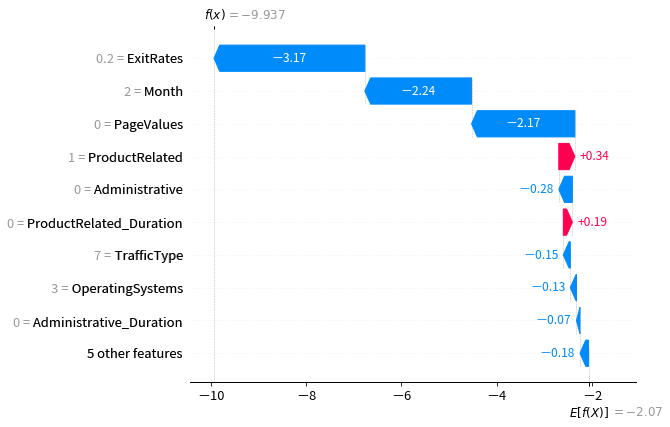

In [465]:
#單一資料
# waterfall

shap.plots.waterfall(shap_values[0])

# force plot

shap.force_plot(explainer.expected_value, shap_values.values[0,:], x_train.iloc[0,:])
shap.initjs()

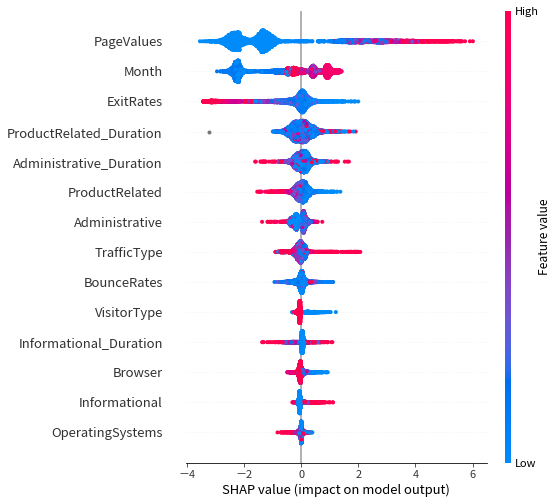

In [466]:
#整體資料
shap.summary_plot(shap_values, x_train)